# Demo 
## WoMG: a Library for Word-of-Mouth Cascades Generation

#### (Python==3.8.5)

The womg package can be installed using the Python Package Index (PyPI) typing:

The womg function can be imported from the womg module:

In [3]:
from womg import womg
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### Definition of the inputs: graph as NetworkX instance and corpus as directory path. 

Let us define a NetworkX instance, a documents' folder path and use them as input in the womg function

In [4]:
N = 100
g = nx.random_geometric_graph(N, .2)
docs_path = 'demo_corpus/'

In [5]:
#!head demo_corpus/AP880212-0078.txt

In [6]:
prop = womg(graph=g, docs_path=docs_path, int_mode='nmf', numb_topics=5)

Training LDA model..
Extracting topic distribution from docs in  demo_corpus/


  0%|          | 0/100 [00:00<?, ?it/s]

Creating interests..
Loading items descriptions (topic distrib for each doc)
Computing cascades.. 


### Main WoMG outputs: 
* bow of the documents,  
* topic distributions of the items, 
* interests of the nodes, 
* propagations.

The prop instance contains all the womg outputs as attributes.

In [ ]:
#prop.propagations

# ----------------------------------------------------------------------

# Input & Output

In [38]:
?womg

In [5]:
# bag of words of the propagating items (DOCS x WORDS) prop.docs


In [6]:
# topic distribution of the propagating items (TOPICS x DOCS) prop.topic_distributions


The highest entry for item 0 is:

In [7]:
# interests for the nodes (TOPICS x NODES) prop.interests


In [14]:
# propagations (DOCS x (TIME, NODE)) prop.propagations


### Displaying the output with NetworkX

In [7]:
def plot_graph(g, node_color, cmap=None):
    NODE_SIZE = 600
    plt.figure(figsize=(8, 8))
    pos = nx.get_node_attributes(g, 'pos')
    nx.draw_networkx_edges(g, pos, alpha=0.4)
    nx.draw_networkx_nodes(g,
                           pos=pos,
                           node_size=NODE_SIZE,
                           alpha=1.0,
                           node_color=node_color,
                           cmap=cmap,
                           edgecolors='k'
                          )
    plt.axis('off') 
    
def prop2activations(prop, item=0):
    activations = np.zeros(N)
    for _time, node in prop.propagations[item]:
        activations[node] = 1
    return activations

Firstly, we display the activated nodes

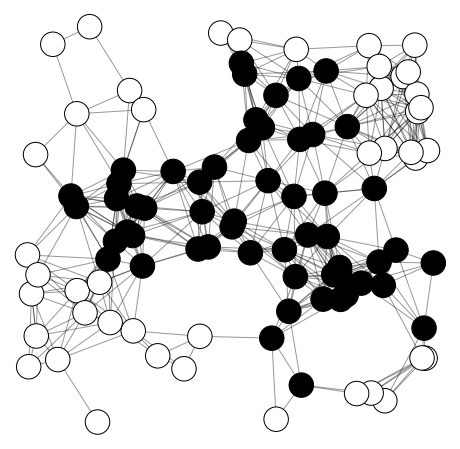

In [8]:
activations = prop2activations(prop, item=0)   
plot_graph(g, activations, plt.cm.binary)

Secondly, we plot the interest in the topic that best describes item 0: component 0 

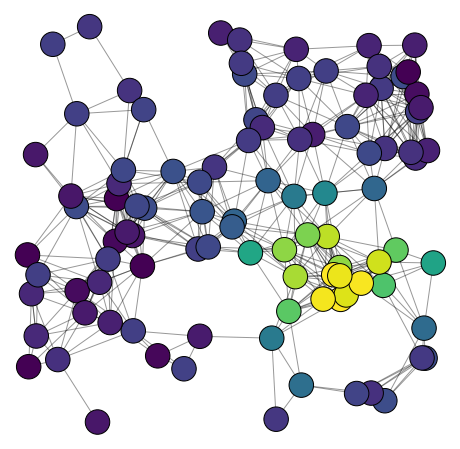

In [11]:
component = 2
plot_graph(g, prop.interests[component])

# Parameters

## 1. Homophily

We now increase the homophily parameter (which ranges from 0 to 1) in order to increment the level of homophily and obtain cascades that are more concentrated around the most interested nodes.

In [15]:
prop = womg(graph=g, docs_path=docs_path, homophily=.95, int_mode='nmf', numb_topics=5)

Training LDA model..
Extracting topic distribution from docs in  demo_corpus/


  0%|          | 0/100 [00:00<?, ?it/s]

Creating interests..
Loading items descriptions (topic distrib for each doc)
Computing cascades.. 


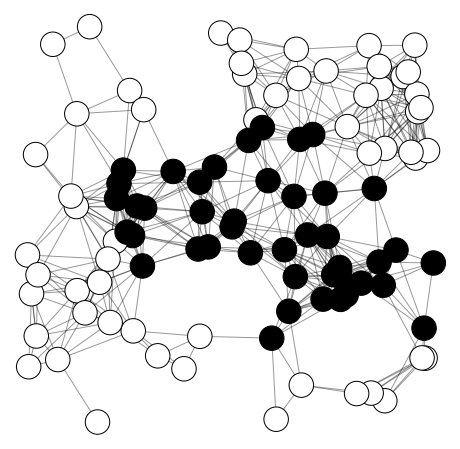

In [16]:
activations = prop2activations(prop, item=0)   
plot_graph(g, activations, plt.cm.binary)

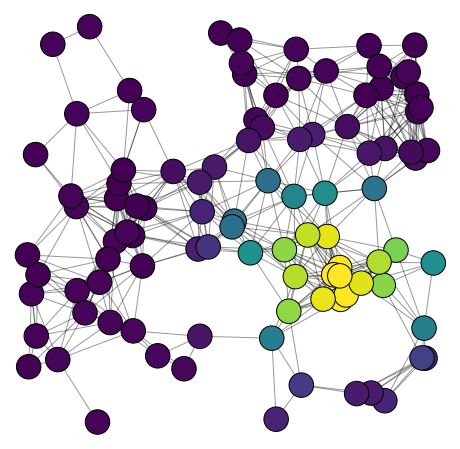

In [17]:
component = 2
plot_graph(g, prop.interests[component])

In [18]:
prop = womg(graph=g, docs_path=docs_path, homophily=.05, int_mode='nmf', numb_topics=5)

Training LDA model..
Extracting topic distribution from docs in  demo_corpus/


  0%|          | 0/100 [00:00<?, ?it/s]

Creating interests..
Loading items descriptions (topic distrib for each doc)
Computing cascades.. 


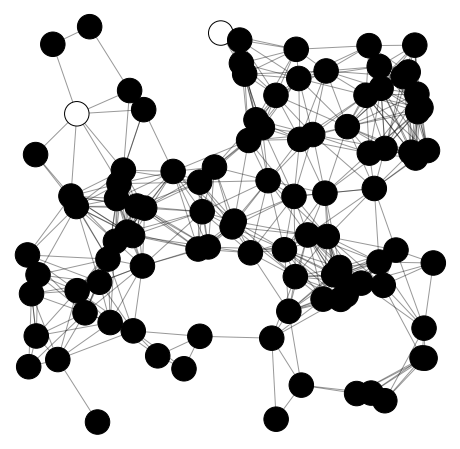

In [19]:
activations = prop2activations(prop, item=0)   
plot_graph(g, activations, plt.cm.binary)

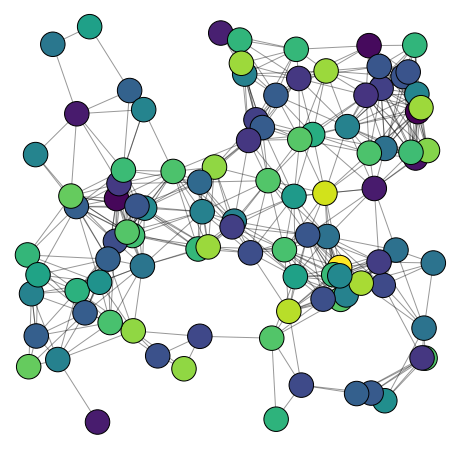

In [20]:
component = 2
plot_graph(g, prop.interests[component])

## 2. Virality resistance

Now we decrease the costant resistance term in propagation.

In [21]:
prop = womg(graph=g, docs_path=docs_path, int_mode='nmf', numb_topics=5, virality_resistance=14)

Training LDA model..
Extracting topic distribution from docs in  demo_corpus/


  0%|          | 0/100 [00:00<?, ?it/s]

Creating interests..
Loading items descriptions (topic distrib for each doc)
Computing cascades.. 


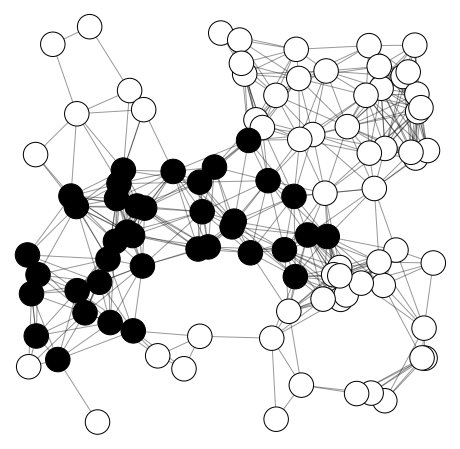

In [22]:
activations = prop2activations(prop, item=1)   
plot_graph(g, activations, plt.cm.binary)

## 3. God-node strength

Now we increase the strength on influence exerted on all nodes at initial timestep without considering the nodes' interests.

In [32]:
prop = womg(graph=g, docs_path=docs_path, int_mode='nmf', homophily=.9, numb_topics=5, gn_strength=14.)

Training LDA model..
Extracting topic distribution from docs in  demo_corpus/


  0%|          | 0/100 [00:00<?, ?it/s]

Creating interests..
Loading items descriptions (topic distrib for each doc)
Computing cascades.. 
WoMG diffusion has been completed.


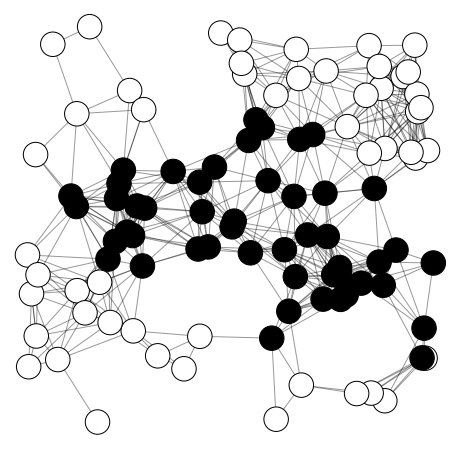

In [34]:
activations = prop2activations(prop, item=0)   
plot_graph(g, activations, plt.cm.binary)

In [35]:
prop = womg(graph=g, numb_docs=10, int_mode='nmf', numb_topics=5, single_activator=True, virality_resistance=2)

Training LDA model..
generating items descript


  0%|          | 0/100 [00:00<?, ?it/s]

Creating interests..
Computing cascades.. 


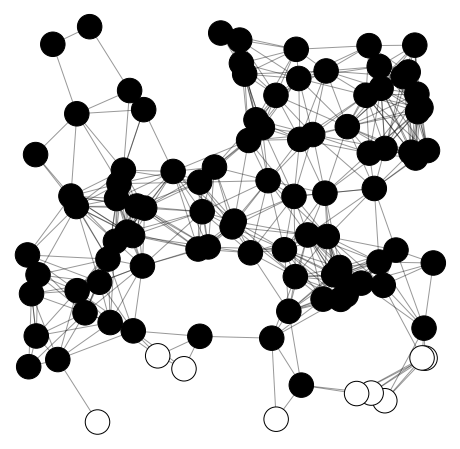

In [36]:
item = 0
activations = np.zeros(N)
for _time, node in prop.propagations[item]:
    activations[node] = 1
    
plot_graph(g, activations, plt.cm.binary)

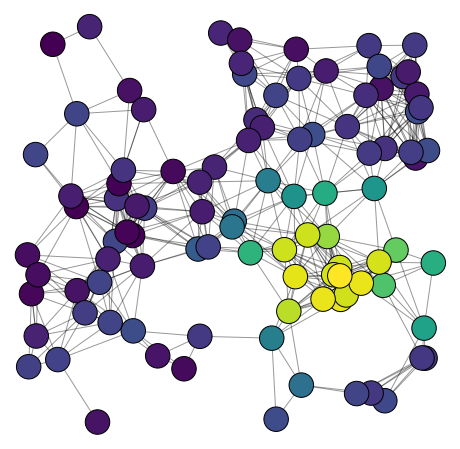

In [37]:
component = 2
plot_graph(g, prop.interests[component])